### Setting up the dataset and environment

In [1]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" an

In [2]:
!pip install datasets

In [3]:
# prompt: Connect to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.load("/content/drive/MyDrive/X_array.npy")
Y = np.load("/content/drive/MyDrive/Y.npy")

In [11]:

import numpy as np

# Assuming X and Y are already loaded as numpy arrays

# Find duplicate rows in X
_, indices = np.unique(X, axis=0, return_index=True)

# Sort the indices to maintain original order
indices = np.sort(indices)
# Filter X and Y based on unique indices
X_unique = X[indices]
Y_unique = Y[indices]

In [12]:
#  Split first 480 into training and last 60 into testing

# Split data into training and testing sets
X_train = X_unique[:480]
X_test = X_unique[480:]
Y_train = Y_unique[:480]
Y_test = Y_unique[480:]

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (480, 330750)
Y_train shape: (480,)
X_test shape: (60, 330750)
Y_test shape: (60,)


In [13]:
# Further split 420 to train and 60 to validation

# Split the training data further into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=60/480, random_state=42)

print("X_train_new shape:", X_train.shape)
print("Y_train_new shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)


X_train_new shape: (420, 330750)
Y_train_new shape: (420,)
X_val shape: (60, 330750)
Y_val shape: (60,)


In [ ]:
# # Split into train and validation sets
# X_train, X_val, Y_train, Y_val = train_test_split(X_unique, Y_unique, test_size=0.2, random_state=42)

# # Further split validation set into validation and test sets (optional)
# X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5, random_state=42)
# print("X_train shape:", X_train.shape)
# print("Y_train shape:", Y_train.shape)
# print("X_val shape:", X_val.shape)
# print("Y_val shape:", Y_val.shape)
# print("X_test shape:", X_test.shape)
# print("Y_test shape:", Y_test.shape)

X_train shape: (432, 330750)
Y_train shape: (432,)
X_val shape: (54, 330750)
Y_val shape: (54,)
X_test shape: (54, 330750)
Y_test shape: (54,)


In [ ]:
# prompt: load X_train.npy and Y.npy and train validation and test split

# import numpy as np
# from sklearn.model_selection import train_test_split

# X = np.load("/content/drive/MyDrive/X_array.npy")
# Y = np.load("/content/drive/MyDrive/Y.npy")

# # Split into train and validation sets
# X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Further split validation set into validation and test sets (optional)
# X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5, random_state=42)

# print("X_train shape:", X_train.shape)
# print("Y_train shape:", Y_train.shape)
# print("X_val shape:", X_val.shape)
# print("Y_val shape:", Y_val.shape)
# print("X_test shape:", X_test.shape)
# print("Y_test shape:", Y_test.shape)

X_train shape: (590, 330750)
Y_train shape: (590,)
X_val shape: (74, 330750)
Y_val shape: (74,)
X_test shape: (74, 330750)
Y_test shape: (74,)


### Import tranformer models

In [14]:
from transformers import AutoFeatureExtractor

model_id = "ntu-spml/distilhubert"
feature_extractor = AutoFeatureExtractor.from_pretrained(
    model_id, do_normalize=True, return_attention_mask=True
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

In [15]:
sampling_rate = feature_extractor.sampling_rate
sampling_rate

16000

In [16]:
# prompt: Convert X_train and Y_train to Dataset({
#     features: [ 'audio', 'genre'],
#     num_rows:
# })
from datasets import Dataset, Audio
import soundfile as sf
import io
def convert_to_dataset(X, Y, sampling_rate):
  """Converts X_train and Y_train to a Dataset with 'audio' and 'genre' features."""

  def convert_to_bytes(audio_data, sampling_rate):
    """Converts audio data to bytes."""
    buffer = io.BytesIO()
    sf.write(buffer, audio_data, sampling_rate, format='WAV')
    audio_bytes = buffer.getvalue()
    return audio_bytes

  X_train_bytes = [convert_to_bytes(audio, 22050) for audio in X]
  # X_train_bytes = X
  listY = Y.tolist()
  int_list = [int(x) for x in listY]
  dataset = Dataset.from_dict({"audio": X_train_bytes, "genre": int_list})
  dataset = dataset.cast_column("audio", Audio(sampling_rate=sampling_rate))
  return dataset


train_dataset = convert_to_dataset(X_train, Y_train, 16000)
val_dataset = convert_to_dataset(X_val, Y_val, 16000)
test_dataset = convert_to_dataset(X_test, Y_test, 16000)

In [17]:
max_duration = 15


def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=feature_extractor.sampling_rate,
        max_length=int(feature_extractor.sampling_rate * max_duration),
        truncation=True,
        return_attention_mask=True,
    )
    return inputs

### Encode all the datasets
X_train_encoded =  train_dataset.map(
    preprocess_function,
    remove_columns=["audio"],
    batched=True,
    batch_size=100,
    num_proc=1,
)
X_val_encoded =  val_dataset.map(
    preprocess_function,
    remove_columns=["audio"],
    batched=True,
    batch_size=100,
    num_proc=1,
)
X_test_encoded =  test_dataset.map(
    preprocess_function,
    remove_columns=["audio"],
    batched=True,
    batch_size=100,
    num_proc=1,
)
X_train_encoded = X_train_encoded.rename_column("genre", "label")
X_val_encoded = X_val_encoded.rename_column("genre", "label")
X_test_encoded = X_test_encoded.rename_column("genre", "label")

Map:   0%|          | 0/420 [00:00<?, ? examples/s]

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

In [18]:
# establish conversion both ways
label2id = {
    'disco': 0,
    'blues': 1,
    'hiphop': 2,
    # Add the rest of your genres here...
    'classical': 3,
    'metal': 4,
    'jazz': 5,
    'reggae': 6,
    'rock': 7,
    'country': 8,
    'pop': 9
}

id2label = {v: k for k, v in label2id.items()}

# Now you can use id2label to get the label from its ID
# For example, if you have the ID 0, you can get the label using id2label[0]
print(id2label)


{0: 'disco', 1: 'blues', 2: 'hiphop', 3: 'classical', 4: 'metal', 5: 'jazz', 6: 'reggae', 7: 'rock', 8: 'country', 9: 'pop'}


In [19]:
from transformers import AutoModelForAudioClassification

num_labels = 10

model = AutoModelForAudioClassification.from_pretrained(
    model_id,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
)

config.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/94.0M [00:00<?, ?B/s]

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at ntu-spml/distilhubert and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
from huggingface_hub import notebook_login

notebook_login()

In [21]:
import evaluate
import numpy as np

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

### Looking at the last layer representations

In [30]:
import wandb
wandb.init(anonymous='allow')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: (1) Private W&B dashboard, no account required
wandb: (2) Use an existing W&B account


wandb: Enter your choice: 1


wandb: You chose 'Private W&B dashboard, no account required'
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: anony-mouse-408481224033612094 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [31]:
from transformers import Trainer
from transformers import TrainingArguments
model_name = model_id.split("/")[-1]
batch_size = 8
gradient_accumulation_steps = 1
num_train_epochs = 20
training_args = TrainingArguments(
    f"{model_name}-finetuned-gtzan",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    push_to_hub=False,
)
trainer = Trainer(
    model,
    training_args,
    train_dataset=X_train_encoded,
    eval_dataset=X_val_encoded,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

trainer.train()

<ipython-input-31-f647549a90a3>:23: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Epoch,Training Loss,Validation Loss,Accuracy
1,2.224400,2.175439,0.366667
2,1.914300,1.817920,0.533333
3,1.507300,1.545492,0.600000
4,1.188100,1.333122,0.650000
5,1.158800,1.252726,0.700000
6,0.901600,1.208388,0.683333
7,0.716300,1.139250,0.733333
8,0.658100,1.082085,0.716667
9,0.648400,1.060320,0.733333
10,0.561600,1.055494,0.733333


TrainOutput(global_step=530, training_loss=1.2018347398290095, metrics={'train_runtime': 1194.3909, 'train_samples_per_second': 3.516, 'train_steps_per_second': 0.444, 'total_flos': 1.43285599296e+17, 'train_loss': 1.2018347398290095, 'epoch': 10.0})

In [32]:
# prompt: evaluate on the testing

trainer.evaluate(eval_dataset=X_test_encoded)


{'eval_loss': 0.9905548095703125,
 'eval_accuracy': 0.6833333333333333,
 'eval_runtime': 12.9657,
 'eval_samples_per_second': 4.628,
 'eval_steps_per_second': 0.617,
 'epoch': 10.0}

In [34]:
import numpy as np
import torch

def get_second_last_layer_output(trainer, dataset):
    """
    Retrieves the output of the layer before the logit layer (last hidden state).
    """
    second_last_layer_outputs = []
    for batch in trainer.get_eval_dataloader(dataset):
        with torch.no_grad():
            # Forward pass with hidden states
            outputs = model(**batch, output_hidden_states=True)

            # Extract the last hidden state (before the classifier head)
            last_hidden_state = outputs.hidden_states[-1]  # Shape: (batch_size, seq_len, hidden_size)

            # Average pooling over the sequence dimension (common for classification tasks)
            pooled_output = last_hidden_state.mean(dim=1)  # Shape: (batch_size, hidden_size)

            second_last_layer_outputs.append(pooled_output.cpu().numpy())
    return np.concatenate(second_last_layer_outputs, axis=0)

# Example usage
second_last_layer_representations = get_second_last_layer_output(trainer, X_test_encoded)
print(second_last_layer_representations.shape)  # (num_samples, hidden_size)

(60, 768)


In [ ]:
#Export the model file

import torch

# # Save the model
# model.save_pretrained("/content/drive/MyDrive/my_audio_classification_model")
# feature_extractor.save_pretrained("/content/drive/MyDrive/my_audio_classification_model")

# # Save other relevant artifacts (e.g., label mappings, etc.)
# # ... (Save label2id, id2label, etc. to files in the same directory)

# # You might also want to save the training arguments and other configurations

# # Example of saving label2id
# torch.save(label2id, "/content/drive/MyDrive/my_audio_classification_model/label2id.pt")

# # ... save other necessary information in the same directory


In [35]:
# prompt: count how many 0,1,2,..,9 in Y_test

from collections import Counter

# Assuming Y_test is already defined as in your provided code

# Count the occurrences of each digit in Y_test
digit_counts = Counter(Y_test)

# Print the counts
for digit, count in digit_counts.items():
    print(f"Digit {digit}: {count}")


Digit 9.0: 6
Digit 7.0: 6
Digit 8.0: 6
Digit 1.0: 6
Digit 0.0: 6
Digit 4.0: 6
Digit 6.0: 6
Digit 3.0: 6
Digit 2.0: 6
Digit 5.0: 6


In [ ]:
Y_test

array([0., 0., 0., 8., 1., 5., 4., 2., 7., 8., 0., 6., 0., 5., 2., 9., 8.,
       6., 5., 8., 8., 9., 0., 1., 6., 6., 1., 6., 3., 9., 7., 9., 8., 8.,
       5., 3., 7., 3., 7., 6., 2., 9., 4., 9., 4., 0., 3., 7., 6., 6., 1.,
       9., 2., 4.])

In [36]:
sorted_indices = np.argsort(Y_test)
sorted_indices

array([ 4, 19, 26, 37, 45, 54, 17,  3, 35, 22, 51, 48, 21, 46, 13,  8, 36,
       57, 18,  7, 53, 38, 43, 27, 31, 10, 44, 55,  5, 28,  9, 30, 20, 16,
       49, 56, 50, 40, 34, 29, 11,  6,  1, 59, 47, 33, 23, 12, 58,  2, 32,
       24, 15, 42,  0, 14, 25, 39, 41, 52])

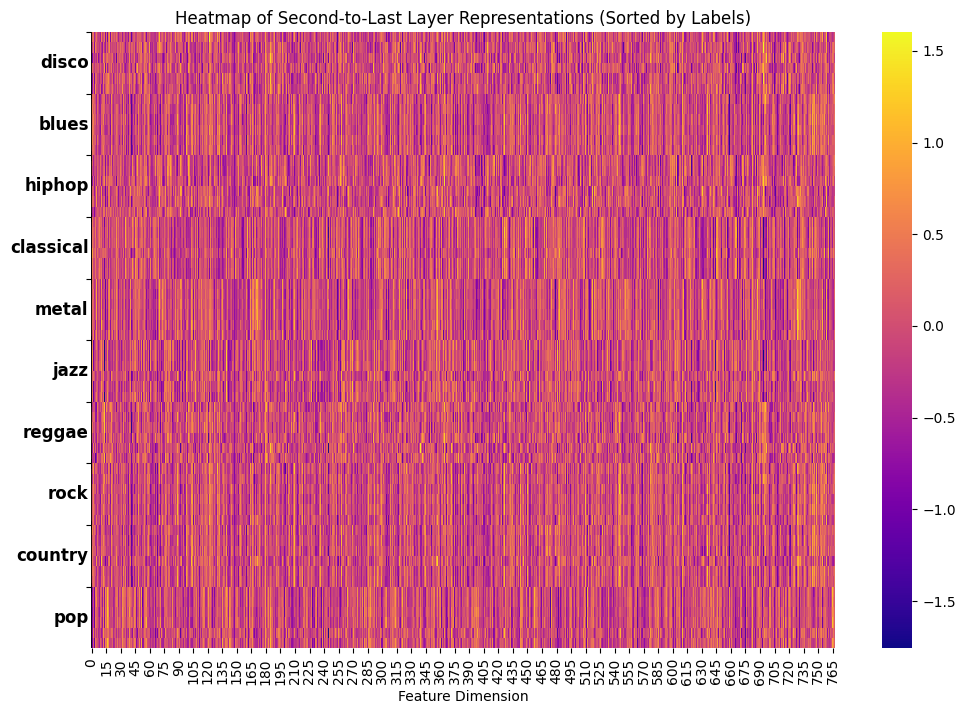

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches

# Assuming second_last_layer_representations, sorted_indices, and Y_test are defined

# Reshape the representations for the heatmap
reshaped_representations = second_last_layer_representations[sorted_indices].reshape(len(Y_test), -1)

# Define label mappings
label2id = {
    'disco': 0, 'blues': 1, 'hiphop': 2, 'classical': 3, 'metal': 4,
    'jazz': 5, 'reggae': 6, 'rock': 7, 'country': 8, 'pop': 9
}
id2label = {v: k for k, v in label2id.items()}  # Reverse mapping

# Define the number of samples per genre in order
genre_counts = [6]*10

# Generate y-tick positions for genre grouping
tick_positions = np.cumsum([0] + genre_counts[:-1])
tick_labels = [id2label[i] for i in range(len(genre_counts))]

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(reshaped_representations, cmap="plasma", yticklabels=False, ax=ax)  # Disable default y-ticks

# Set custom y-ticks
plt.yticks(tick_positions,  rotation=0)

# Draw brackets using patches
for start, count, label in zip(tick_positions, genre_counts, tick_labels):
    bracket = patches.FancyBboxPatch(
        (-1.5, start),  # Start position (x, y)
        width=0.5, height=count,  # Bracket height covers genre rows
        boxstyle="square,pad=0.3",  # Bracket style
        edgecolor="black", linewidth=2, facecolor="none"  # Bracket appearance
    )
    ax.add_patch(bracket)  # Add bracket to plot
    ax.text(-2.5, start + count / 2, label, va='center', ha='right', fontsize=12, fontweight="bold")

# Set labels and title
plt.title("Heatmap of Second-to-Last Layer Representations (Sorted by Labels)")
plt.xlabel("Feature Dimension")
# plt.ylabel("Music Genre")

plt.show()


### Training logs from 2-5 runs

In [22]:
import wandb
wandb.init(anonymous='allow')
from transformers import Trainer
from transformers import TrainingArguments
model_name = model_id.split("/")[-1]
batch_size = 8
gradient_accumulation_steps = 1
num_train_epochs = 20
training_args = TrainingArguments(
    f"{model_name}-finetuned-gtzan",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    push_to_hub=False,
)
trainer = Trainer(
    model,
    training_args,
    train_dataset=X_train_encoded,
    eval_dataset=X_val_encoded,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

trainer.train()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: (1) Private W&B dashboard, no account required
wandb: (2) Use an existing W&B account


wandb: Enter your choice: 1


wandb: You chose 'Private W&B dashboard, no account required'
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: anony-mouse-224591411150651121 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


<ipython-input-22-fc8f0c2deba9>:25: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Epoch,Training Loss,Validation Loss,Accuracy
1,2.220900,2.171110,0.366667
2,1.878900,1.746598,0.466667
3,1.537000,1.525317,0.616667
4,1.196500,1.357463,0.650000
5,1.207400,1.255298,0.666667
6,0.954600,1.130749,0.683333
7,0.741300,1.056217,0.683333
8,0.640100,1.046193,0.766667
9,0.656100,0.998118,0.733333
10,0.593900,0.990871,0.750000


TrainOutput(global_step=530, training_loss=1.2131026357974646, metrics={'train_runtime': 1173.708, 'train_samples_per_second': 3.578, 'train_steps_per_second': 0.452, 'total_flos': 1.43285599296e+17, 'train_loss': 1.2131026357974646, 'epoch': 10.0})

In [23]:

trainer.evaluate(eval_dataset=X_test_encoded)


{'eval_loss': 1.0909444093704224,
 'eval_accuracy': 0.7166666666666667,
 'eval_runtime': 13.0307,
 'eval_samples_per_second': 4.605,
 'eval_steps_per_second': 0.614,
 'epoch': 10.0}

In [26]:
current_epoch = trainer.state.epoch
# Set the total number of epochs to the current epoch plus 10
total_epochs = current_epoch + 10

# Update the training arguments with the new total epochs
trainer.args.num_train_epochs = total_epochs

trainer.train(resume_from_checkpoint=True) # Remove num_train_epochs argument

Epoch,Training Loss,Validation Loss,Accuracy
11,0.660400,1.040003,0.683333
12,0.516800,1.005416,0.683333
13,0.381600,0.985407,0.683333
14,0.281400,0.958611,0.700000
15,0.191100,0.916020,0.716667
16,0.167800,0.932301,0.683333
17,0.122100,0.925985,0.700000
18,0.100300,0.969589,0.683333
19,0.082700,0.968417,0.683333
20,0.090400,0.974666,0.683333


TrainOutput(global_step=1060, training_loss=0.12431644583648106, metrics={'train_runtime': 1172.9552, 'train_samples_per_second': 7.161, 'train_steps_per_second': 0.904, 'total_flos': 2.86571198592e+17, 'train_loss': 0.12431644583648106, 'epoch': 20.0})

In [27]:

trainer.evaluate(eval_dataset=X_test_encoded)


{'eval_loss': 1.0909444093704224,
 'eval_accuracy': 0.7166666666666667,
 'eval_runtime': 12.8468,
 'eval_samples_per_second': 4.67,
 'eval_steps_per_second': 0.623,
 'epoch': 20.0}

In [28]:
from transformers import AutoModelForAudioClassification

num_labels = 10

model = AutoModelForAudioClassification.from_pretrained(
    model_id,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
)
import wandb
wandb.init(anonymous='allow')
from transformers import Trainer
from transformers import TrainingArguments
model_name = model_id.split("/")[-1]
batch_size = 8
gradient_accumulation_steps = 1
num_train_epochs = 20
training_args = TrainingArguments(
    f"{model_name}-finetuned-gtzan",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    push_to_hub=False,
)
trainer = Trainer(
    model,
    training_args,
    train_dataset=X_train_encoded,
    eval_dataset=X_val_encoded,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

trainer.train()

eval/accuracy,▁▃▅▆▆▇▇█▇█▇▇▇▇▇▇▇▇▇▇▇▇
eval/loss,█▆▄▃▃▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▂
eval/runtime,█▂▁▁▅▂▂▃▃▂█▆▃▂▁▅▄▆▄▄▄▅
eval/samples_per_second,▁▇██▄▇▇▆▆▇▁▃▆▇█▄▅▃▅▅▅▄
eval/steps_per_second,▁▇██▄▇▇▆▇▇▁▄▆▇█▄▅▃▅▅▅▄
train/epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
train/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█████
train/grad_norm,▁▁▂▃▂▃▃▅▂▃▃▃▂▄▃▄▂▃▂▂▂▃▄▂█▁▇▃▂▂▂▄▁▁▁▁▂▁▁▂
train/learning_rate,▂▂▇▇███▇▇▆▆▆▅▅▄▄▃▃▂▂▁▁▅▅▅▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁
train/loss,███▇▆▅▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁
eval/accuracy,0.71667


<ipython-input-28-fc8f0c2deba9>:25: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.613900,0.982778,0.716667


KeyboardInterrupt: 

In [32]:
from transformers import AutoModelForAudioClassification

num_labels = 10

model = AutoModelForAudioClassification.from_pretrained(
    model_id,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
)
# import wandb
# wandb.init(anonymous='allow')
from transformers import Trainer
from transformers import TrainingArguments
model_name = model_id.split("/")[-1]
batch_size = 8
gradient_accumulation_steps = 1
num_train_epochs = 20
training_args = TrainingArguments(
    f"{model_name}-finetuned-gtzan",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    push_to_hub=False,
)
trainer = Trainer(
    model,
    training_args,
    train_dataset=X_train_encoded,
    eval_dataset=X_val_encoded,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at ntu-spml/distilhubert and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-32-27fe492c4fe0>:35: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,2.248700,2.194694,0.416667
2,1.878300,1.797054,0.483333
3,1.540900,1.516056,0.616667
4,1.203500,1.353023,0.666667
5,1.162500,1.272380,0.700000
6,0.833900,1.209336,0.616667
7,0.720200,1.151023,0.700000
8,0.714700,1.130282,0.650000
9,0.642400,1.082569,0.683333
10,0.610400,1.084394,0.650000


TrainOutput(global_step=530, training_loss=1.2187437237433667, metrics={'train_runtime': 1183.4518, 'train_samples_per_second': 3.549, 'train_steps_per_second': 0.448, 'total_flos': 1.43285599296e+17, 'train_loss': 1.2187437237433667, 'epoch': 10.0})

In [33]:
trainer.evaluate(eval_dataset=X_test_encoded)

{'eval_loss': 1.1742737293243408,
 'eval_accuracy': 0.6333333333333333,
 'eval_runtime': 12.8761,
 'eval_samples_per_second': 4.66,
 'eval_steps_per_second': 0.621,
 'epoch': 10.0}

In [30]:
from transformers import AutoModelForAudioClassification

num_labels = 10

model = AutoModelForAudioClassification.from_pretrained(
    model_id,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
)
# import wandb
# wandb.init(anonymous='allow')
from transformers import Trainer
from transformers import TrainingArguments
model_name = model_id.split("/")[-1]
batch_size = 8
gradient_accumulation_steps = 1
num_train_epochs = 20
training_args = TrainingArguments(
    f"{model_name}-finetuned-gtzan",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    push_to_hub=False,
)
trainer = Trainer(
    model,
    training_args,
    train_dataset=X_train_encoded,
    eval_dataset=X_val_encoded,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at ntu-spml/distilhubert and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-30-27fe492c4fe0>:35: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,2.225800,2.158366,0.366667
2,1.854300,1.682308,0.616667
3,1.519500,1.436800,0.733333
4,1.135000,1.268852,0.683333
5,1.068300,1.187105,0.700000
6,0.864000,1.048535,0.716667
7,0.669200,1.001442,0.683333
8,0.633200,0.966679,0.733333
9,0.559400,0.909473,0.766667
10,0.463400,0.909363,0.750000


TrainOutput(global_step=530, training_loss=1.1539635424344046, metrics={'train_runtime': 1179.3355, 'train_samples_per_second': 3.561, 'train_steps_per_second': 0.449, 'total_flos': 1.43285599296e+17, 'train_loss': 1.1539635424344046, 'epoch': 10.0})

In [31]:
trainer.evaluate(eval_dataset=X_test_encoded)

{'eval_loss': 0.9842590093612671,
 'eval_accuracy': 0.6833333333333333,
 'eval_runtime': 12.8343,
 'eval_samples_per_second': 4.675,
 'eval_steps_per_second': 0.623,
 'epoch': 10.0}

In [34]:
from transformers import AutoModelForAudioClassification

num_labels = 10

model = AutoModelForAudioClassification.from_pretrained(
    model_id,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
)
# import wandb
# wandb.init(anonymous='allow')
from transformers import Trainer
from transformers import TrainingArguments
model_name = model_id.split("/")[-1]
batch_size = 8
gradient_accumulation_steps = 1
num_train_epochs = 20
training_args = TrainingArguments(
    f"{model_name}-finetuned-gtzan",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    push_to_hub=False,
)
trainer = Trainer(
    model,
    training_args,
    train_dataset=X_train_encoded,
    eval_dataset=X_val_encoded,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at ntu-spml/distilhubert and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-34-27fe492c4fe0>:35: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,2.248700,2.194726,0.416667
2,1.878200,1.797070,0.483333
3,1.540900,1.516113,0.616667
4,1.203500,1.352991,0.666667
5,1.162700,1.272424,0.700000
6,0.833900,1.209574,0.616667
7,0.720200,1.151019,0.700000
8,0.714700,1.130147,0.650000
9,0.642400,1.082555,0.683333
10,0.610500,1.084529,0.650000


TrainOutput(global_step=530, training_loss=1.2187765445349352, metrics={'train_runtime': 1194.8967, 'train_samples_per_second': 3.515, 'train_steps_per_second': 0.444, 'total_flos': 1.43285599296e+17, 'train_loss': 1.2187765445349352, 'epoch': 10.0})

In [35]:
trainer.evaluate(eval_dataset=X_test_encoded)

{'eval_loss': 1.1741557121276855,
 'eval_accuracy': 0.6333333333333333,
 'eval_runtime': 13.0641,
 'eval_samples_per_second': 4.593,
 'eval_steps_per_second': 0.612,
 'epoch': 10.0}

In [36]:
from transformers import AutoModelForAudioClassification

num_labels = 10

model = AutoModelForAudioClassification.from_pretrained(
    model_id,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
)
# import wandb
# wandb.init(anonymous='allow')
from transformers import Trainer
from transformers import TrainingArguments
model_name = model_id.split("/")[-1]
batch_size = 8
gradient_accumulation_steps = 1
num_train_epochs = 20
training_args = TrainingArguments(
    f"{model_name}-finetuned-gtzan",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    push_to_hub=False,
)
trainer = Trainer(
    model,
    training_args,
    train_dataset=X_train_encoded,
    eval_dataset=X_val_encoded,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at ntu-spml/distilhubert and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-36-27fe492c4fe0>:35: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,2.248700,2.194743,0.416667
2,1.878300,1.796956,0.483333
3,1.540900,1.516113,0.616667
4,1.203800,1.352950,0.666667
5,1.162500,1.272465,0.700000
6,0.833800,1.209471,0.616667
7,0.720100,1.151007,0.700000
8,0.714600,1.130119,0.650000
9,0.642300,1.082579,0.683333
10,0.610400,1.084447,0.650000


TrainOutput(global_step=530, training_loss=1.2187591840636056, metrics={'train_runtime': 1199.0743, 'train_samples_per_second': 3.503, 'train_steps_per_second': 0.442, 'total_flos': 1.43285599296e+17, 'train_loss': 1.2187591840636056, 'epoch': 10.0})

In [37]:
trainer.evaluate(eval_dataset=X_test_encoded)

{'eval_loss': 1.1741312742233276,
 'eval_accuracy': 0.6333333333333333,
 'eval_runtime': 13.0372,
 'eval_samples_per_second': 4.602,
 'eval_steps_per_second': 0.614,
 'epoch': 10.0}

In [38]:
# prompt: Calculate the standard deviation of 0.6333,0.6333, 0.6833, 0.7166, 0.6333

import numpy as np

data = [0.6333, 0.6333, 0.6833, 0.7166, 0.6333]
std_dev = np.std(data)
std_dev


np.float64(0.03430776005512457)

In [39]:
np.mean(data)

np.float64(0.6599600000000001)